# 문제 07
iris.csv파일을 읽고 SepalLength,SepalWidth,PetalLength,PetalWidth 열로 Name 를 예측하는 ANN 모델을 생성하세요.   

In [1]:
from tensorflow.keras import layers, models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.python.keras.utils import np_utils  # to_categorical
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
def ANN_seq_func(Nin, Nh, Nout):
    model =models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,))) 
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [4]:
def one_hot_encoding():
    enc = OneHotEncoder(sparse_output=False)
    enc.fit(iris['Name'].values.reshape(-1, 1))
    encoded = enc.transform(iris['Name'].values.reshape(-1,1))
    df = pd.DataFrame(encoded, columns=enc.categories_[0])
    return df

In [5]:
from tensorflow.python.keras.utils import np_utils  # to_categorical
def Data_func():
    X = iris.iloc[:, 0:4]
    Y = iris.iloc[:, 5:8]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y) 
    return X_train, X_test, Y_train, Y_test

In [6]:
onehot_name = one_hot_encoding()

In [7]:
iris = pd.concat([iris, onehot_name], axis = 1)

In [8]:
Nin = 4
Nh = 5
Nout = 3

model = ANN_seq_func(Nin, Nh, Nout)
X_train, X_test, Y_train, Y_test = Data_func()



1/1 [==============================] - 0s 36ms/step - loss: 0.9467 - accuracy: 0.5789
Test Loss and Accuracy -> [0.9466645121574402, 0.5789473652839661]


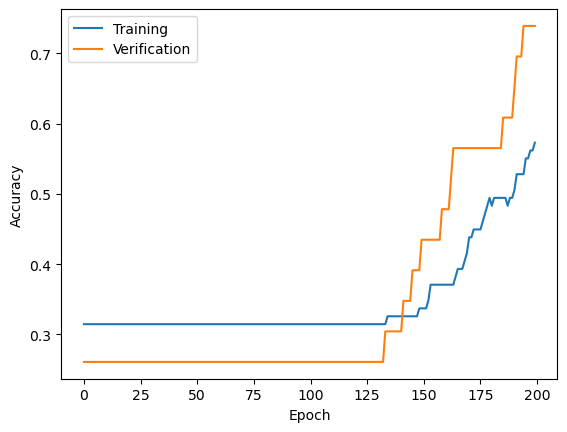

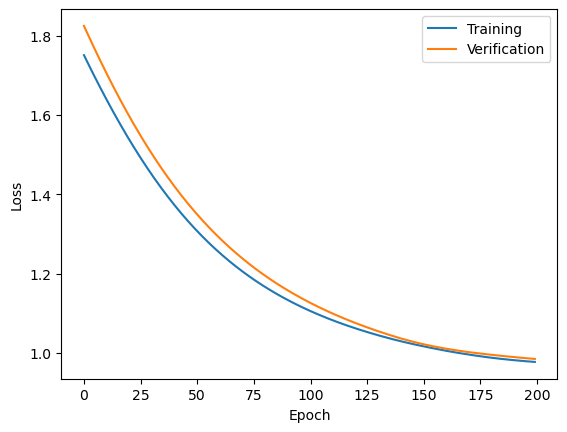

In [9]:
history = model.fit(
    X_train, 
    Y_train, 
    epochs=200, 
    batch_size=100, 
    validation_split=0.2,
    verbose=0
) 
performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)

history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Verification'], loc=0)
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Verification'], loc=0)
plt.show()